checkout this kaggle kernel: https://www.kaggle.com/kernels/notebooks/new?forkParentScriptVersionId=470167&userName=alexgomes3

In [0]:
  # Code to download the datasets (run only if dataset not found)
!mkdir input
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

test_downloaded = drive.CreateFile({'id': '1xBuctuuZBBvIjQmH0sg49Dx17CC1T2px'})
train_downloaded = drive.CreateFile({'id': '1aFyHjN9XXs051r_s1ydCfyq_5DWiCefJ'})
content_train = train_downloaded.GetContentFile("input/train.csv")
content_test = test_downloaded.GetContentFile("input/test.csv")

In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
df_train = pd.read_csv('input/train.csv').sample(10000)
X_train, y_train = df_train.drop(columns=['label']), df_train.label

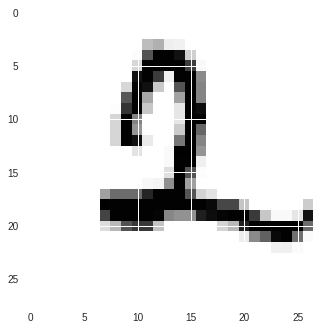

In [21]:
im_index = 5
first_image = X_train.iloc[25].values.reshape(28,28)
plt.imshow(first_image)
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression(n_jobs=-1)

In [25]:
%timeit lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


1 loop, best of 3: 9min 16s per loop


In [12]:
%timeit lr.predict(X_train)

10 loops, best of 3: 53.2 ms per loop
